In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import time

csv_path = 'breast_cancer.csv'
cancer_data = pd.read_csv(csv_path)
cancer_data.drop(columns=['id', 'Unnamed: 32'], inplace=True)
cancer_data['diagnosis'] = cancer_data['diagnosis'].replace({'M': 1, 'B': 0})
cancer_data.rename(columns={'concave points_worst': 'concave_points_worst',
                             'concave points_se': 'concave_points_se',
                             'concave points_mean': 'concave_points_mean'}, inplace=True)
class_distribution = cancer_data['diagnosis'].value_counts()
print(class_distribution)
X = cancer_data.drop("diagnosis", axis=1)
Y = cancer_data["diagnosis"]

def compare_models(X, Y):
    models = {
        "K-NN": {"model": KNeighborsClassifier(), "param_grid": {"n_neighbors": range(1, 20)}},
        "Logistic Regression": {"model": LogisticRegression(), "param_grid": {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}},
        "Random Forest": {"model": RandomForestClassifier(), "param_grid": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}},
        "Naive Bayes": {"model": GaussianNB(), "param_grid": {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}}
    }

    for model_name, model_info in models.items():
        print(f"Training {model_name} model...")
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        model = model_info["model"]
        param_grid = model_info["param_grid"]

        print(f"Results before hyperparameter tuning for {model_name} model:")
        start_time = time.time()
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)
        end_time = time.time()
        duration = end_time - start_time
        print(f"{model_name} model (without hyperparameter tuning) accuracy:", accuracy)
        print("Classification Report:\n", classification_report(Y_test, Y_pred))
        print(f"Duration without hyperparameter tuning: {duration:.4f} seconds")

        start_time = time.time()
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, Y_train)
        end_time = time.time()
        grid_search_duration = end_time - start_time

        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        print(f"Best parameter for {model_name}:", best_params)

        start_time = time.time()
        best_model = model.__class__(**best_params)
        best_model.fit(X_train, Y_train)
        print(f"Results after hyperparameter tuning for {model_name} model:")
        Y_pred_tuned = best_model.predict(X_test)
        accuracy_tuned = accuracy_score(Y_test, Y_pred_tuned)
        end_time = time.time()
        duration_tuned = end_time - start_time

        print(f"{model_name} model (with hyperparameter tuning) accuracy:", accuracy_tuned)
        print("Classification Report:\n", classification_report(Y_test, Y_pred_tuned))
        print(f"Duration for hyperparameter tuning: {grid_search_duration:.4f} seconds")
        print(f"Duration with hyperparameter tuning: {duration_tuned:.4f} seconds")

        if accuracy_tuned > accuracy:
            print("Hyperparameter tuning improved the accuracy.")
        elif accuracy_tuned < accuracy:
            print("Hyperparameter tuning decreased the accuracy.")
        else:
            print("Hyperparameter tuning did not affect the accuracy.")

        print("\n" + "="*50 + "\n")

compare_models(X, Y)


diagnosis
0    357
1    212
Name: count, dtype: int64
Training K-NN model...
Results before hyperparameter tuning for K-NN model:
K-NN model (without hyperparameter tuning) accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Duration without hyperparameter tuning: 0.0931 seconds
Best parameter for K-NN: {'n_neighbors': 9}
Results after hyperparameter tuning for K-NN model:
K-NN model (with hyperparameter tuning) accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.

c:\Users\Aslı Nur Karaman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression model (without hyperparameter tuning) accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Duration without hyperparameter tuning: 0.1653 seconds


c:\Users\Aslı Nur Karaman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Aslı Nur Karaman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Aslı Nur Karaman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Aslı Nur Karaman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Aslı Nur Karaman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: Conver

Best parameter for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Results after hyperparameter tuning for Logistic Regression model:
Logistic Regression model (with hyperparameter tuning) accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Duration for hyperparameter tuning: 32.6522 seconds
Duration with hyperparameter tuning: 0.6780 seconds
Hyperparameter tuning improved the accuracy.


Training Random Forest model...
Results before hyperparameter tuning for Random Forest model:
Random Forest model (without hyperparameter tuning) accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

  

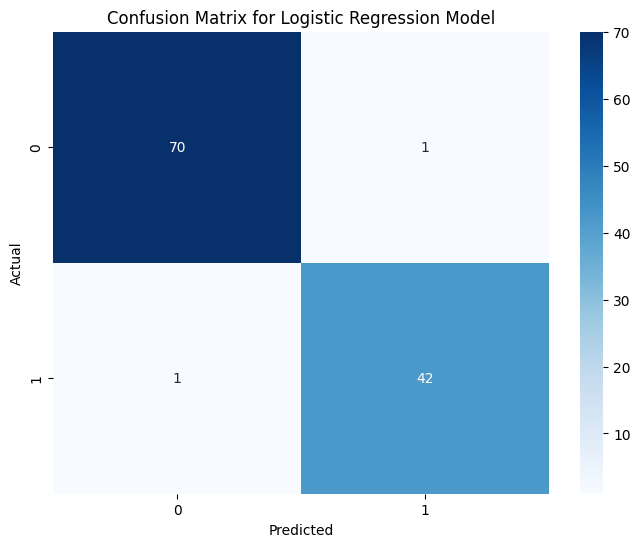

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

log_reg_model = LogisticRegression(C=100, penalty='l1', solver='liblinear')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
log_reg_model.fit(X_train, Y_train)
Y_pred = log_reg_model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()
